In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Simple Knowledge of SMA strategies

In [4]:
# import zipfile
# with zipfile.ZipFile("Part3_Materials.zip","r") as zip_ref:
#     zip_ref.extractall("")

In [5]:
df = pd.read_csv("data/eurusd.csv", parse_dates=["Date"], index_col = ["Date"])

In [6]:
df.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


Text(0.5, 1.0, 'EUR/USD')

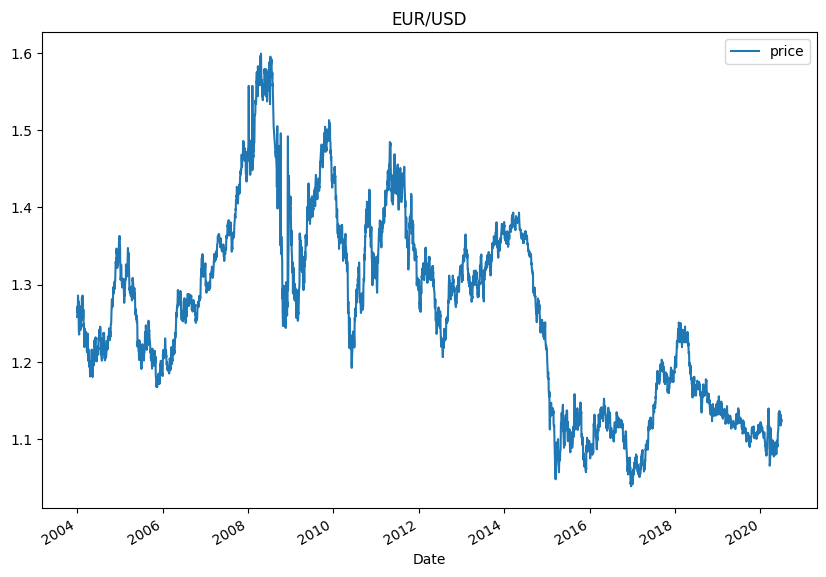

In [8]:
df.plot(figsize=(10,7))
plt.title("EUR/USD")

In [9]:
df.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


## Finding log returns

In [10]:
# Finding log returns
df["log_returns"] = df["price"].div(df["price"].shift(1))
df["log_returns"] = np.log(df["log_returns"])
df.head()

,price,log_returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315


In [11]:
df.tail()

,price,log_returns
Date,,
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562
2020-06-29,1.122586,0.000337
2020-06-30,1.124720,0.001899


We could see that, we've invested for 16 years.

In [12]:
df.dropna(inplace=True)

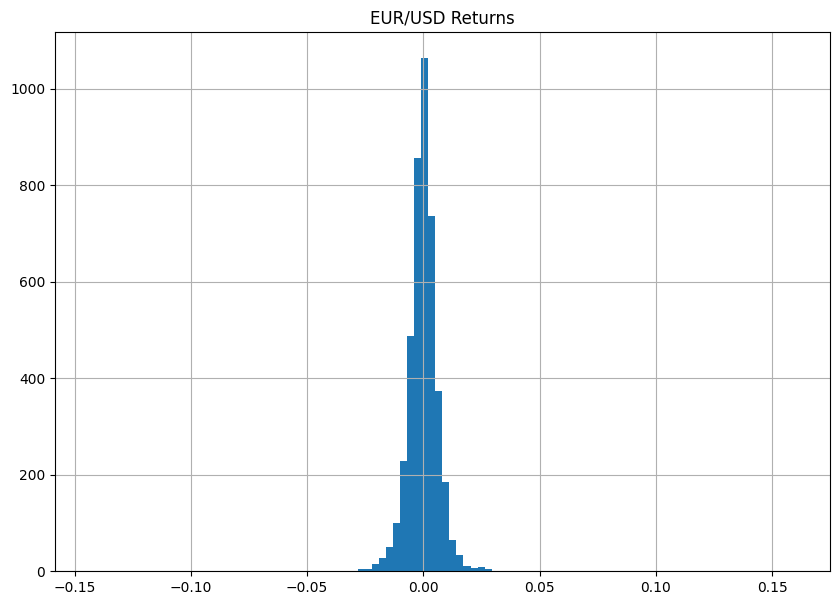

In [13]:
df["log_returns"].hist(bins=100, figsize=(10,7))
plt.title("EUR/USD Returns")
plt.show()

In [14]:
cumulative_re = df["log_returns"].sum()
cumulative_re

-0.11214302770699758

In [15]:
percent_return = np.exp(cumulative_re)
print(f"Percent that return if we invest in this stock for 16 years: {percent_return}")

Percent that return if we invest in this stock for 16 years: 0.8939163935445148


In [16]:
df.head()

,price,log_returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547


## Finding Cumulative Returns

In [17]:
# Cumulative sum of `log_returns`
df["cumulative_log_returns"] = df["log_returns"].cumsum()
df.head()

,price,log_returns,cumulative_log_returns
Date,,,
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.008313,0.008313
2004-01-06,1.272103,0.002681,0.010994
2004-01-07,1.264095,-0.006315,0.004679
2004-01-08,1.277498,0.010547,0.015226


In [18]:
df["cumulative_returns"] = np.exp(df["cumulative_log_returns"])
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns
Date,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348
2004-01-06,1.272103,0.002681,0.010994,1.011055
2004-01-07,1.264095,-0.006315,0.004679,1.004690
2004-01-08,1.277498,0.010547,0.015226,1.015343


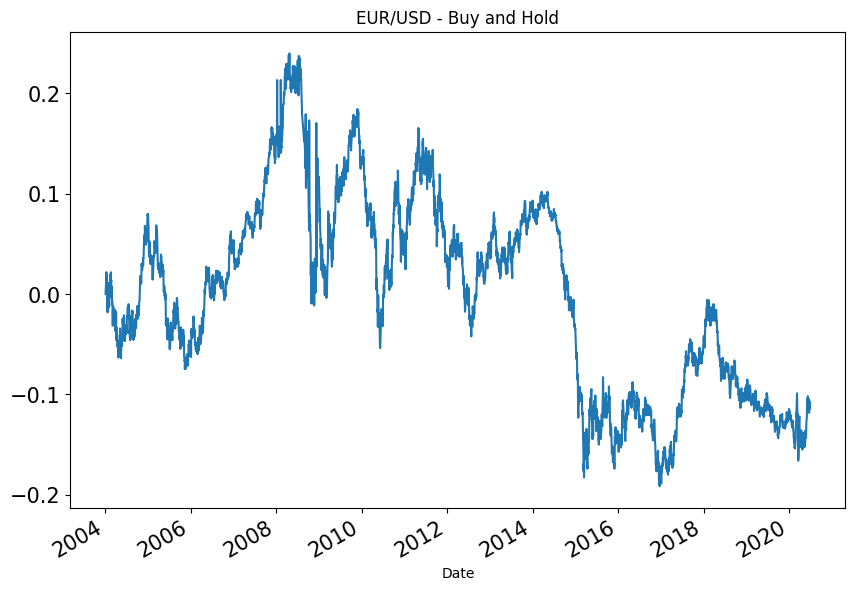

In [19]:
df["cumulative_log_returns"].plot(figsize=(10,7), title="EUR/USD - Buy and Hold", fontsize=15)
plt.show()

In [20]:
df.tail()

,price,log_returns,cumulative_log_returns,cumulative_returns
Date,,,,
2020-06-24,1.131235,0.002892,-0.106368,0.899094
2020-06-25,1.125087,-0.005449,-0.111817,0.894208
2020-06-26,1.122208,-0.002562,-0.114379,0.891920
2020-06-29,1.122586,0.000337,-0.114042,0.892221
2020-06-30,1.124720,0.001899,-0.112143,0.893916


In [21]:
# Finding absoulute performance
absolute_per = df["cumulative_returns"][-1]
print(f"Return if we invest 1$: {absolute_per}")

Return if we invest 1$: 0.8939163935445149


## Annualized mean return and risk

In [22]:
# Finding mean returns
mean_log_returns = df["log_returns"].mean() * 252
print(f"Annualized returns: {mean_log_returns}\nAnnualized returns percent: {round(mean_log_returns*100,3)}%")

Annualized returns: -0.006612083056191715
Annualized returns percent: -0.661%


In [23]:
std_log_returns = df["log_returns"].std() * np.sqrt(252)
print(f"Risk return percent: {std_log_returns}%")

Risk return percent: 0.12054120479431406%


## Maximum drawdown
For the siauation that returns are not normally distributed and as a consequence, extreme outcomes and the risk are not fully reflected

In [24]:
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns
Date,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348
2004-01-06,1.272103,0.002681,0.010994,1.011055
2004-01-07,1.264095,-0.006315,0.004679,1.004690
2004-01-08,1.277498,0.010547,0.015226,1.015343


In [25]:
df["cumulative_maximum"] = df["cumulative_returns"].cummax()
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum
Date,,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,0.010994,1.011055,1.011055
2004-01-07,1.264095,-0.006315,0.004679,1.004690,1.011055
2004-01-08,1.277498,0.010547,0.015226,1.015343,1.015343


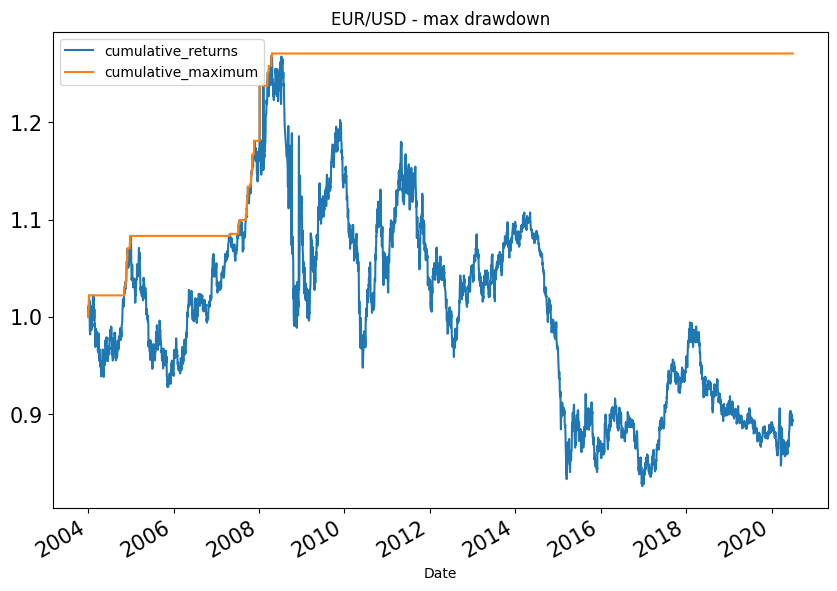

In [26]:
df[["cumulative_returns", "cumulative_maximum"]].plot(figsize=(10,7), title = "EUR/USD - max drawdown", fontsize=15)
plt.show()

In [27]:
df["draw_down"] = df["cumulative_maximum"]-df["cumulative_returns"]
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down
Date,,,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000,1.000000,0.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348,1.008348,0.000000
2004-01-06,1.272103,0.002681,0.010994,1.011055,1.011055,0.000000
2004-01-07,1.264095,-0.006315,0.004679,1.004690,1.011055,0.006365
2004-01-08,1.277498,0.010547,0.015226,1.015343,1.015343,0.000000


In [28]:
df["draw_down"].max(), df["draw_down"].head()

(0.4448840569933439,
 Date
 2004-01-02    0.000000
 2004-01-05    0.000000
 2004-01-06    0.000000
 2004-01-07    0.006365
 2004-01-08    0.000000
 Name: draw_down, dtype: float64)

# Definining SMA strategy

In [29]:
df

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down
Date,,,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000,1.000000,0.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348,1.008348,0.000000
2004-01-06,1.272103,0.002681,0.010994,1.011055,1.011055,0.000000
2004-01-07,1.264095,-0.006315,0.004679,1.004690,1.011055,0.006365
2004-01-08,1.277498,0.010547,0.015226,1.015343,1.015343,0.000000
...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,-0.106368,0.899094,1.270709,0.371615
2020-06-25,1.125087,-0.005449,-0.111817,0.894208,1.270709,0.376500
2020-06-26,1.122208,-0.002562,-0.114379,0.891920,1.270709,0.378788


In [30]:
sma_s, sma_l = 50, 200
df["sma_s"] = df["price"].rolling(sma_s).mean()
df["sma_l"] = df["price"].rolling(sma_l).mean()
df.tail()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down,sma_s,sma_l
Date,,,,,,,,
2020-06-24,1.131235,0.002892,-0.106368,0.899094,1.270709,0.371615,1.101794,1.103430
2020-06-25,1.125087,-0.005449,-0.111817,0.894208,1.270709,0.376500,1.102486,1.103540
2020-06-26,1.122208,-0.002562,-0.114379,0.891920,1.270709,0.378788,1.103213,1.103627
2020-06-29,1.122586,0.000337,-0.114042,0.892221,1.270709,0.378488,1.103931,1.103730
2020-06-30,1.124720,0.001899,-0.112143,0.893916,1.270709,0.376792,1.104695,1.103857


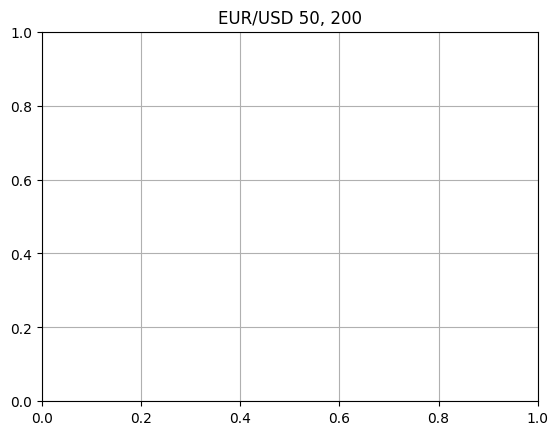

In [31]:
plt.title(f"EUR/USD {sma_s}, {sma_l}")
plt.grid()

In [32]:
df.dropna(inplace=True)

In [33]:
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down,sma_s,sma_l
Date,,,,,,,,
2004-10-07,1.229906,0.001475,-0.022739,0.977517,1.022015,0.044497,1.221840,1.226081
2004-10-08,1.241003,0.008982,-0.013758,0.986337,1.022015,0.035678,1.222628,1.225995
2004-10-11,1.238405,-0.002095,-0.015853,0.984272,1.022015,0.037742,1.223352,1.225843
2004-10-12,1.232104,-0.005102,-0.020954,0.979264,1.022015,0.042751,1.223888,1.225643
2004-10-13,1.234903,0.002270,-0.018685,0.981489,1.022015,0.040526,1.224466,1.225497


Text(0.5, 1.0, 'EUR/USD - 50, 200')

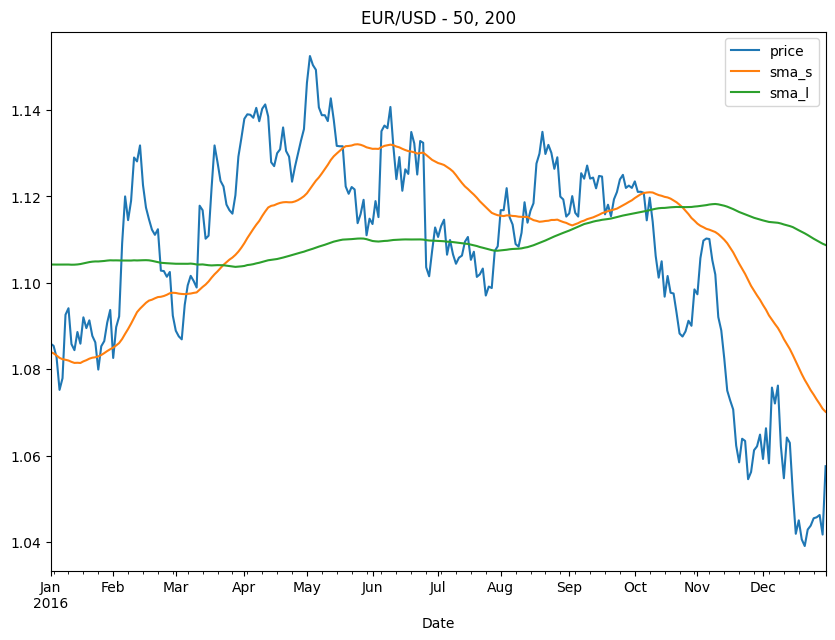

In [34]:
df[["price","sma_s","sma_l"]].loc["2016"].plot(figsize=(10,7))
plt.title(f"EUR/USD - {sma_s}, {sma_l}")

### Buying Strategy
From April we buy the stock and sell at the end of October because we could see that `SMA_S` is higher than `SMA_L`

In [35]:
df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1)
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down,sma_s,sma_l,position
Date,,,,,,,,,
2004-10-07,1.229906,0.001475,-0.022739,0.977517,1.022015,0.044497,1.221840,1.226081,-1
2004-10-08,1.241003,0.008982,-0.013758,0.986337,1.022015,0.035678,1.222628,1.225995,-1
2004-10-11,1.238405,-0.002095,-0.015853,0.984272,1.022015,0.037742,1.223352,1.225843,-1
2004-10-12,1.232104,-0.005102,-0.020954,0.979264,1.022015,0.042751,1.223888,1.225643,-1
2004-10-13,1.234903,0.002270,-0.018685,0.981489,1.022015,0.040526,1.224466,1.225497,-1


<AxesSubplot: xlabel='Date'>

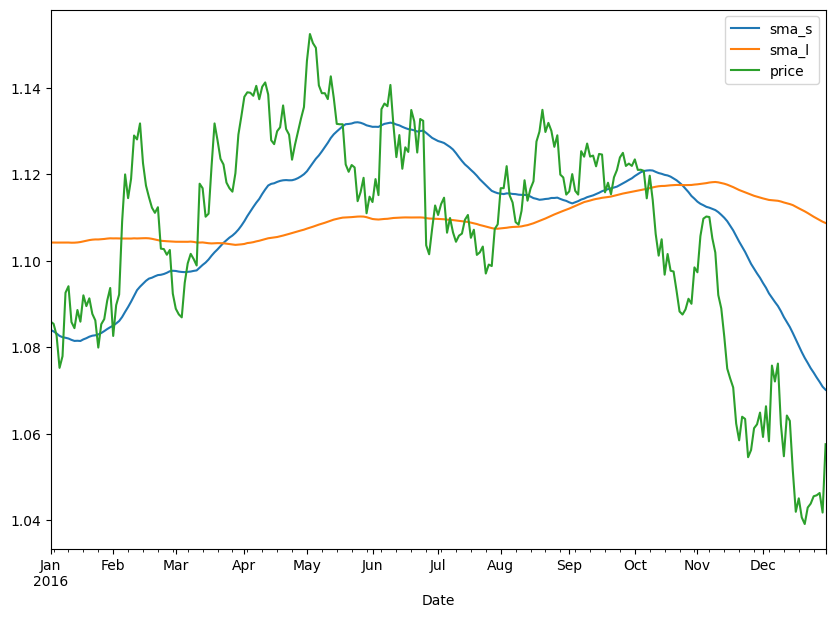

In [36]:
df[["sma_s","sma_l","price"]].loc["2016,2017"].plot(figsize=(10,7),secondary_y = "position")

<AxesSubplot: xlabel='Date'>

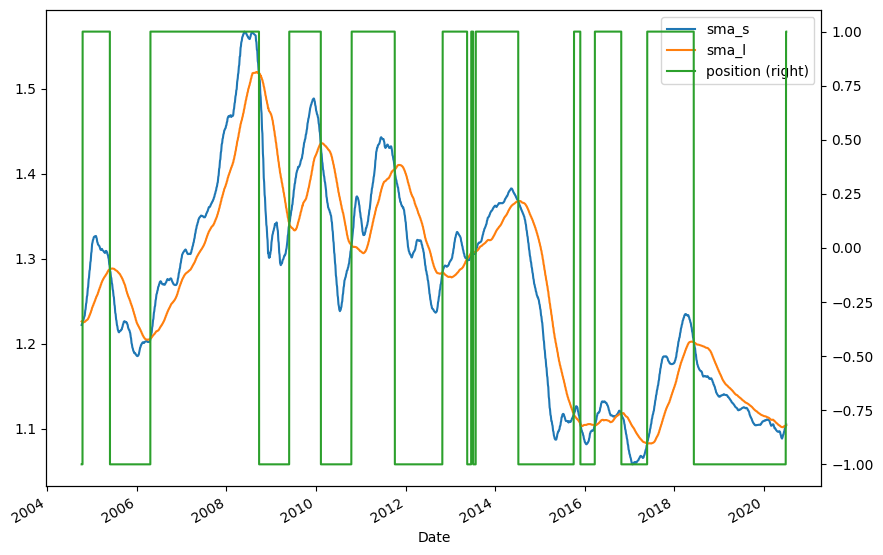

In [37]:
df[["sma_s","sma_l","position"]].plot(figsize=(10,7),secondary_y = "position")

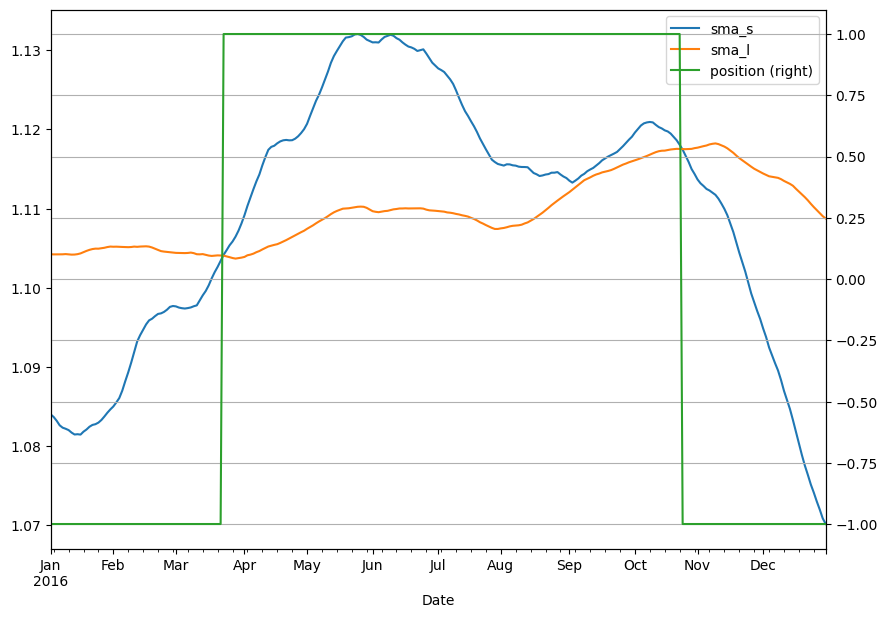

In [38]:
df[["sma_s","sma_l","position"]].loc["2016"].plot(figsize=(10,7),secondary_y = "position")
plt.grid()

# Vectorized Strategy Backtesting

In [39]:
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down,sma_s,sma_l,position
Date,,,,,,,,,
2004-10-07,1.229906,0.001475,-0.022739,0.977517,1.022015,0.044497,1.221840,1.226081,-1
2004-10-08,1.241003,0.008982,-0.013758,0.986337,1.022015,0.035678,1.222628,1.225995,-1
2004-10-11,1.238405,-0.002095,-0.015853,0.984272,1.022015,0.037742,1.223352,1.225843,-1
2004-10-12,1.232104,-0.005102,-0.020954,0.979264,1.022015,0.042751,1.223888,1.225643,-1
2004-10-13,1.234903,0.002270,-0.018685,0.981489,1.022015,0.040526,1.224466,1.225497,-1


In [40]:
df_vsb = df.copy()
df_vsb = df_vsb[["price","sma_s","sma_l","position"]]
df_vsb.head(10)

,price,sma_s,sma_l,position
Date,,,,
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
2004-10-13,1.234903,1.224466,1.225497,-1
2004-10-14,1.238896,1.225140,1.225304,-1
2004-10-15,1.247894,1.225482,1.225114,1
2004-10-18,1.248907,1.225915,1.224988,1
2004-10-19,1.251894,1.226480,1.224855,1


In [41]:
df_vsb["returns"] = np.log(df_vsb["price"].div(df_vsb["price"].shift(1)))
df_vsb.head()

,price,sma_s,sma_l,position,returns
Date,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,NaN
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270


In [42]:
df_vsb["strategy"] = df_vsb["position"].shift(1) * df_vsb["returns"]
df_vsb.dropna(inplace=True)

df_vsb

,price,sma_s,sma_l,position,returns,strategy
Date,,,,,,
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270
2004-10-14,1.238896,1.225140,1.225304,-1,0.003228,-0.003228
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


### Cumulative sum of the returns

In [43]:
df_vsb[["returns", "strategy"]].sum()

returns    -0.089404
strategy    0.251066
dtype: float64

Calculated the value of one dollar invested over time (over 16 years)

In [44]:
df_vsb[["returns", "strategy"]].sum().apply(np.exp)

returns     0.914476
strategy    1.285395
dtype: float64

Annualized return

In [45]:
df_vsb[["returns","strategy"]].mean()*252

returns    -0.00553
strategy    0.01553
dtype: float64

Annualized risk

In [46]:
df_vsb[["returns","strategy"]].std()*np.sqrt(252)

returns     0.120820
strategy    0.120817
dtype: float64

In [47]:
df_vsb.head()

,price,sma_s,sma_l,position,returns,strategy
Date,,,,,,
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270
2004-10-14,1.238896,1.225140,1.225304,-1,0.003228,-0.003228


In [48]:
# Cumulative returns
df_vsb["creturns"] = df_vsb["returns"].cumsum().apply(np.exp)

# Cumulative strategy
df_vsb["cstrategy"] = df_vsb["strategy"].cumsum().apply(np.exp)

df_vsb

,price,sma_s,sma_l,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.009022,0.991059
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.006910,0.993137
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.001787,0.998217
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.004063,0.995954
2004-10-14,1.238896,1.225140,1.225304,-1,0.003228,-0.003228,1.007310,0.992744
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.919773,1.273148
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.914775,1.280104
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.912434,1.283388


## Visualization
From the plot below, the first 10 years make no difference. However, it changes at the start of 2016

<AxesSubplot: title={'center': 'EUR/USD - SMA50 | SMA200'}, xlabel='Date'>

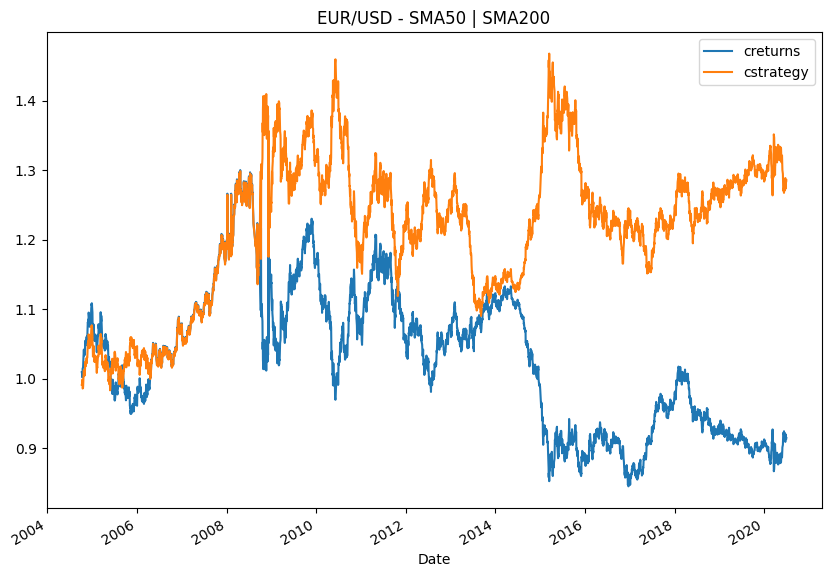

In [49]:
df_vsb[["creturns","cstrategy"]].plot(figsize=(10,7), title=f"EUR/USD - SMA{sma_s} | SMA{sma_l}")

In [50]:
df_vsb["creturns"].iloc[-1]

0.9144762393451014

In [51]:
outperf = df_vsb["cstrategy"].iloc[-1] - df_vsb["creturns"].iloc[-1]
print(f"Outperformance: {outperf*100}%")

Outperformance: 37.091844615223565%


# Finding optimal SMA strategy

In [52]:
df = pd.read_csv("data/eurusd.csv", parse_dates=["Date"], index_col="Date")
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [87]:
def test_strategy(SMA:list):
    """_summary_

    Args:
        SMA (list): _description_

    Returns:
        _type_: _description_
    """
    data = df.copy()
    # Finding the returns
    data["returns"] = np.log(data["price"].div(data["price"].shift(1)))
    data["SMA_S"] = data["price"].rolling(int(SMA[0])).mean()
    data["SMA_L"] = data["price"].rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    """
    If short SMA is greater than longer, then we go long
    """
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace=True)
    # Calculate the cumulative return
    performance = np.exp(data["strategy"].sum())
    
    return performance, data

In [88]:
perf_50_200, data_50_200 = test_strategy([50,200])
print(f"If we invest 1 it will return: {perf_50_200}")

If we invest 1 it will return: 1.2835003323288487


In [89]:
sma_s_range = range(10,50,1)
sma_l_range = range(100,252,1)

In [90]:
from itertools import product
combinations = list(product(sma_s_range, sma_l_range))
print(f"Example of first 10 combinations:\n{combinations[0:10]}")
print(f"Length of combination: {len(combinations)}")

Example of first 10 combinations:
[(10, 100), (10, 101), (10, 102), (10, 103), (10, 104), (10, 105), (10, 106), (10, 107), (10, 108), (10, 109)]
Length of combination: 6080


In [91]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))
    
results[0]

(0.919639848594834,
                price   returns     SMA_S     SMA_L  position  strategy
 Date                                                                  
 2004-05-20  1.195700 -0.003918  1.191300  1.231154        -1  0.003918
 2004-05-21  1.202805  0.005924  1.192780  1.230600        -1 -0.005924
 2004-05-24  1.199904 -0.002415  1.194311  1.229912        -1  0.002415
 2004-05-25  1.210097  0.008459  1.196501  1.229292        -1 -0.008459
 2004-05-26  1.211094  0.000823  1.198559  1.228762        -1 -0.000823
 ...              ...       ...       ...       ...       ...       ...
 2020-06-24  1.131235  0.002892  1.127325  1.099489         1  0.002892
 2020-06-25  1.125087 -0.005449  1.126179  1.099737         1 -0.005449
 2020-06-26  1.122208 -0.002562  1.125519  1.099976         1 -0.002562
 2020-06-29  1.122586  0.000337  1.125257  1.100253         1  0.000337
 2020-06-30  1.124720  0.001899  1.124352  1.100587         1  0.001899
 
 [4175 rows x 6 columns])

In [95]:
results[-1]

(1.2701853950319477,
                price   returns     SMA_S     SMA_L  position  strategy
 Date                                                                  
 2004-12-20  1.339208  0.005928  1.298627  1.240352         1  0.005928
 2004-12-21  1.336898 -0.001726  1.300766  1.240665         1 -0.001726
 2004-12-22  1.339100  0.001646  1.302892  1.240946         1  0.001646
 2004-12-23  1.351205  0.008999  1.305184  1.241261         1  0.008999
 2004-12-24  1.353803  0.001921  1.307346  1.241618         1  0.001921
 ...              ...       ...       ...       ...       ...       ...
 2020-06-24  1.131235  0.002892  1.102024  1.105327        -1 -0.002892
 2020-06-25  1.125087 -0.005449  1.102825  1.105344        -1  0.005449
 2020-06-26  1.122208 -0.002562  1.103550  1.105330        -1  0.002562
 2020-06-29  1.122586  0.000337  1.104287  1.105319        -1 -0.000337
 2020-06-30  1.124720  0.001899  1.105084  1.105309        -1 -0.001899
 
 [4024 rows x 6 columns])

In [97]:
perform_per = []
for i in range(len(results)):
    perform_per.append(results[i][0])
    
perform_per[0:10]

[0.919639848594834,
 0.9017909001165384,
 0.9088514707606253,
 0.9172039081156574,
 0.9902316124249487,
 0.9839526868794093,
 1.0304555530676556,
 1.0580627844394732,
 1.0209474697557395,
 1.1225414594776157]

In [101]:
best_perform = np.max(perform_per)
print(f"Best performance: {best_perform}")

Best performance: 2.5266939897810787


In [105]:
best_perform_index = np.argmax(perform_per)
print(f"Best performance index: {best_perform_index}")
 
# Finding the best combinations
best_perform_comb = combinations[best_perform_index]
print(f"Best strategy: {best_perform_comb}")

Best performance index: 5509
Best strategy: (46, 137)


In [107]:
many_results = pd.DataFrame(data=combinations, columns=["SMA_S","SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [109]:
many_results["performance"] = perform_per
many_results

,SMA_S,SMA_L,performance
0,10,100,0.919640
1,10,101,0.901791
2,10,102,0.908851
3,10,103,0.917204
4,10,104,0.990232
...,...,...,...
6075,49,247,1.282403
6076,49,248,1.303129
6077,49,249,1.267525
6078,49,250,1.275176


In [110]:
many_results.nlargest(10, "performance")

,SMA_S,SMA_L,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


In [111]:

many_results.nsmallest(10, "performance")

,SMA_S,SMA_L,performance
461,13,105,0.835621
310,12,106,0.837311
309,12,105,0.846303
159,11,107,0.849825
307,12,103,0.851647
308,12,104,0.852194
608,14,100,0.865872
306,12,102,0.871889
462,13,106,0.876600
458,13,102,0.876784


In [142]:
sma_s = 46
sma_l = 137

df_trial = df.copy()
df_trial

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [143]:
df_trial["sma_s"] = df["price"].rolling(sma_s).mean()
df_trial["sma_l"] = df["price"].rolling(sma_l).mean()

df_trial

,price,sma_s,sma_l
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.103047,1.102654
2020-06-25,1.125087,1.103905,1.102737
2020-06-26,1.122208,1.104801,1.102788


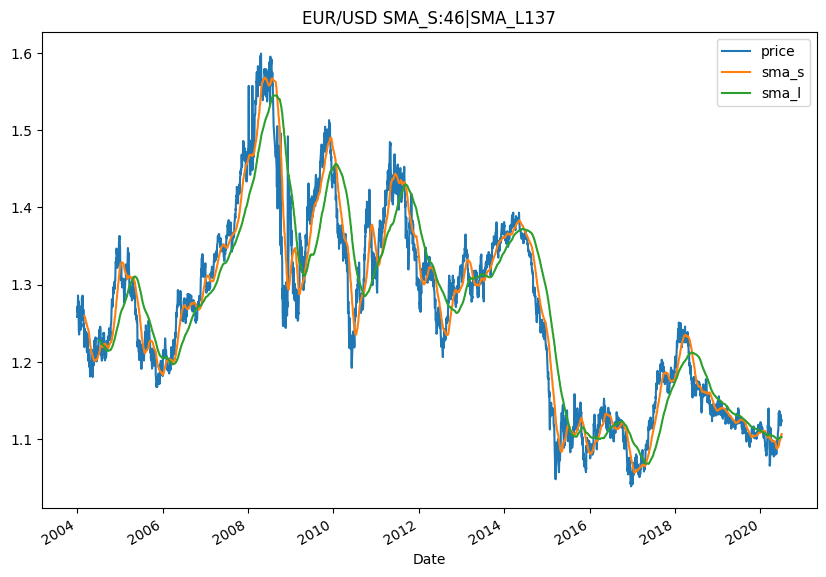

In [144]:
df_trial.plot(figsize=(10,7))
plt.title(f"EUR/USD SMA_S:{sma_s}|SMA_L{sma_l}");
plt.legend();

In [145]:
df_trial.dropna(inplace=True)
df_trial

,price,sma_s,sma_l
Date,,,
2004-07-09,1.241897,1.212185,1.227891
2004-07-12,1.240803,1.213333,1.227764
2004-07-13,1.233304,1.214392,1.227583
2004-07-14,1.238497,1.215486,1.227362
2004-07-15,1.235605,1.216466,1.227096
...,...,...,...
2020-06-24,1.131235,1.103047,1.102654
2020-06-25,1.125087,1.103905,1.102737
2020-06-26,1.122208,1.104801,1.102788


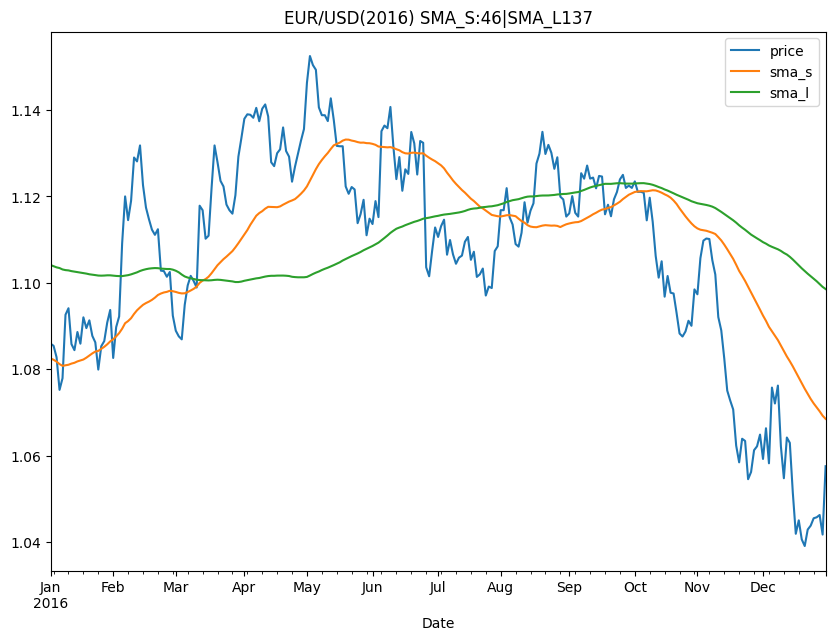

In [146]:
df_trial.loc["2016",:].plot(figsize=(10,7))
plt.title(f"EUR/USD(2016) SMA_S:{sma_s}|SMA_L{sma_l}");
plt.legend();


In [147]:
df_trial["position"] = np.where(df_trial["sma_s"]> df_trial["sma_l"],1,-1)
df_trial

,price,sma_s,sma_l,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


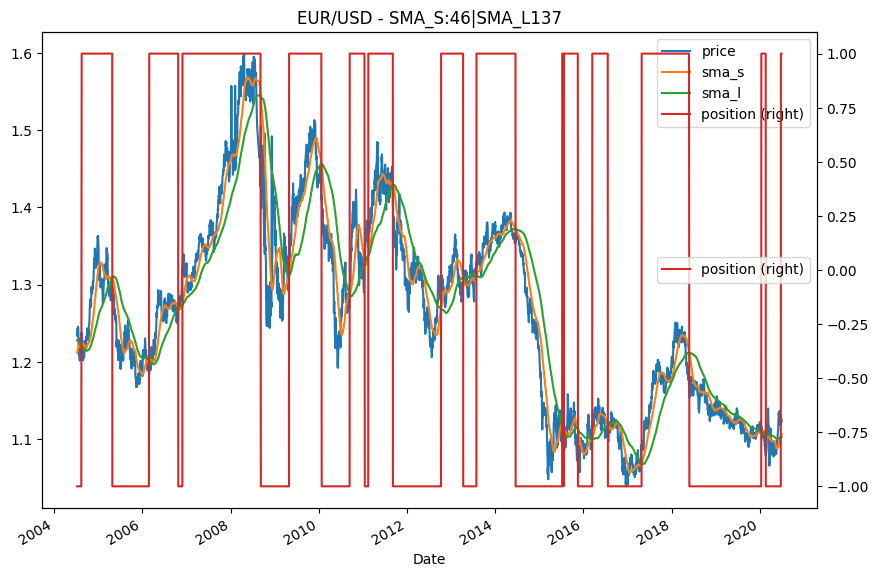

In [148]:
df_trial.plot(figsize=(10,7), title=f"EUR/USD - SMA_S:{sma_s}|SMA_L{sma_l}",secondary_y="position")
plt.legend();

In [149]:
df_trial

,price,sma_s,sma_l,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


## Backtesting

In [150]:
df_trial["returns"] = np.log(df_trial["price"].div(df_trial["price"].shift(1)))
df_trial["strategy"] = df_trial["position"].shift(1) *df_trial["returns"]
df_trial

,price,sma_s,sma_l,position,returns,strategy
Date,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,NaN,NaN
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338
...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562


In [151]:
df_trial.dropna(inplace=True)

### Absoulute performance

In [152]:
df_trial[["returns","strategy"]].sum()

returns    -0.099105
strategy    0.926912
dtype: float64

### Annualized return

In [153]:
df_trial[["returns","strategy"]].sum()*252 #

returns     -24.974572
strategy    233.581755
dtype: float64

### Annualized risk

In [155]:
df_trial[["returns","strategy"]].std() * np.sqrt(252)

returns     0.120418
strategy    0.120366
dtype: float64

In [156]:
df_trial["cum_returns"] = df_trial["returns"].cumsum().apply(np.exp)
df_trial["cum_strategy"] = df_trial["strategy"].cumsum().apply(np.exp)

df_trial

,price,sma_s,sma_l,position,returns,strategy,cum_returns,cum_strategy
Date,,,,,,,,
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,0.999119,1.000882
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.993081,1.006967
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.997263,1.002745
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.994934,1.005092
2004-07-16,1.245594,1.217883,1.226961,-1,0.008051,-0.008051,1.002977,0.997032
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.910893,2.541328
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.905943,2.527519
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.903625,2.521051


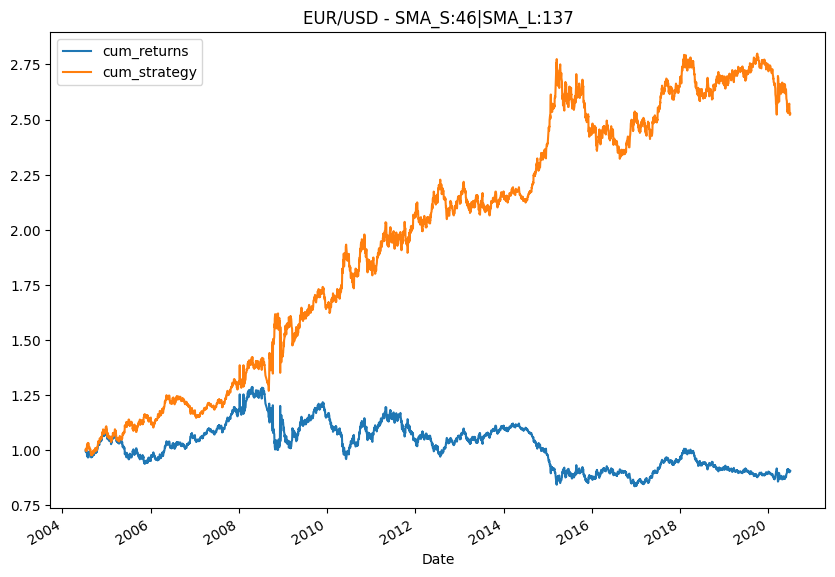

In [157]:
df_trial[["cum_returns","cum_strategy"]].plot(figsize=(10,7), title=f"EUR/USD - SMA_S:{sma_s}|SMA_L:{sma_l}")
plt.legend();